In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, kstest, mannwhitneyu, ttest_ind, levene, kruskal
from sklearn.preprocessing import StandardScaler

In [140]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

In [3]:
df = pd.read_csv('Lab4.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


name - название страны   
child_mort - cмертность детей в возрасте до 5 лет на 1000 живорождений   
exports - экспорт товаров и услуг на душу населения. Приведено в % от ВВП на душу населения   
health - общие расходы на здравоохранение на душу населения. Указаны как % от ВВП на душу населения   
Imports - импорт товаров и услуг на душу населения. Указано в % от ВВП на душу населения.   
Income - чистый доход на человека   
Inflation - измерение годового темпа роста общего ВВП   
life_expec - ожидаемая продолжительность жизни   
total_fer - ожидаемая рождаемость   
gdpp - ВВП на душу населения
  

# EDA

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
features = df.columns[1:]

In [52]:
for col in df.columns:
    n = df[col].nunique()
    print(f'{col}: {n}')

country: 167
child_mort: 139
exports: 147
health: 147
imports: 151
income: 156
inflation: 156
life_expec: 127
total_fer: 138
gdpp: 157


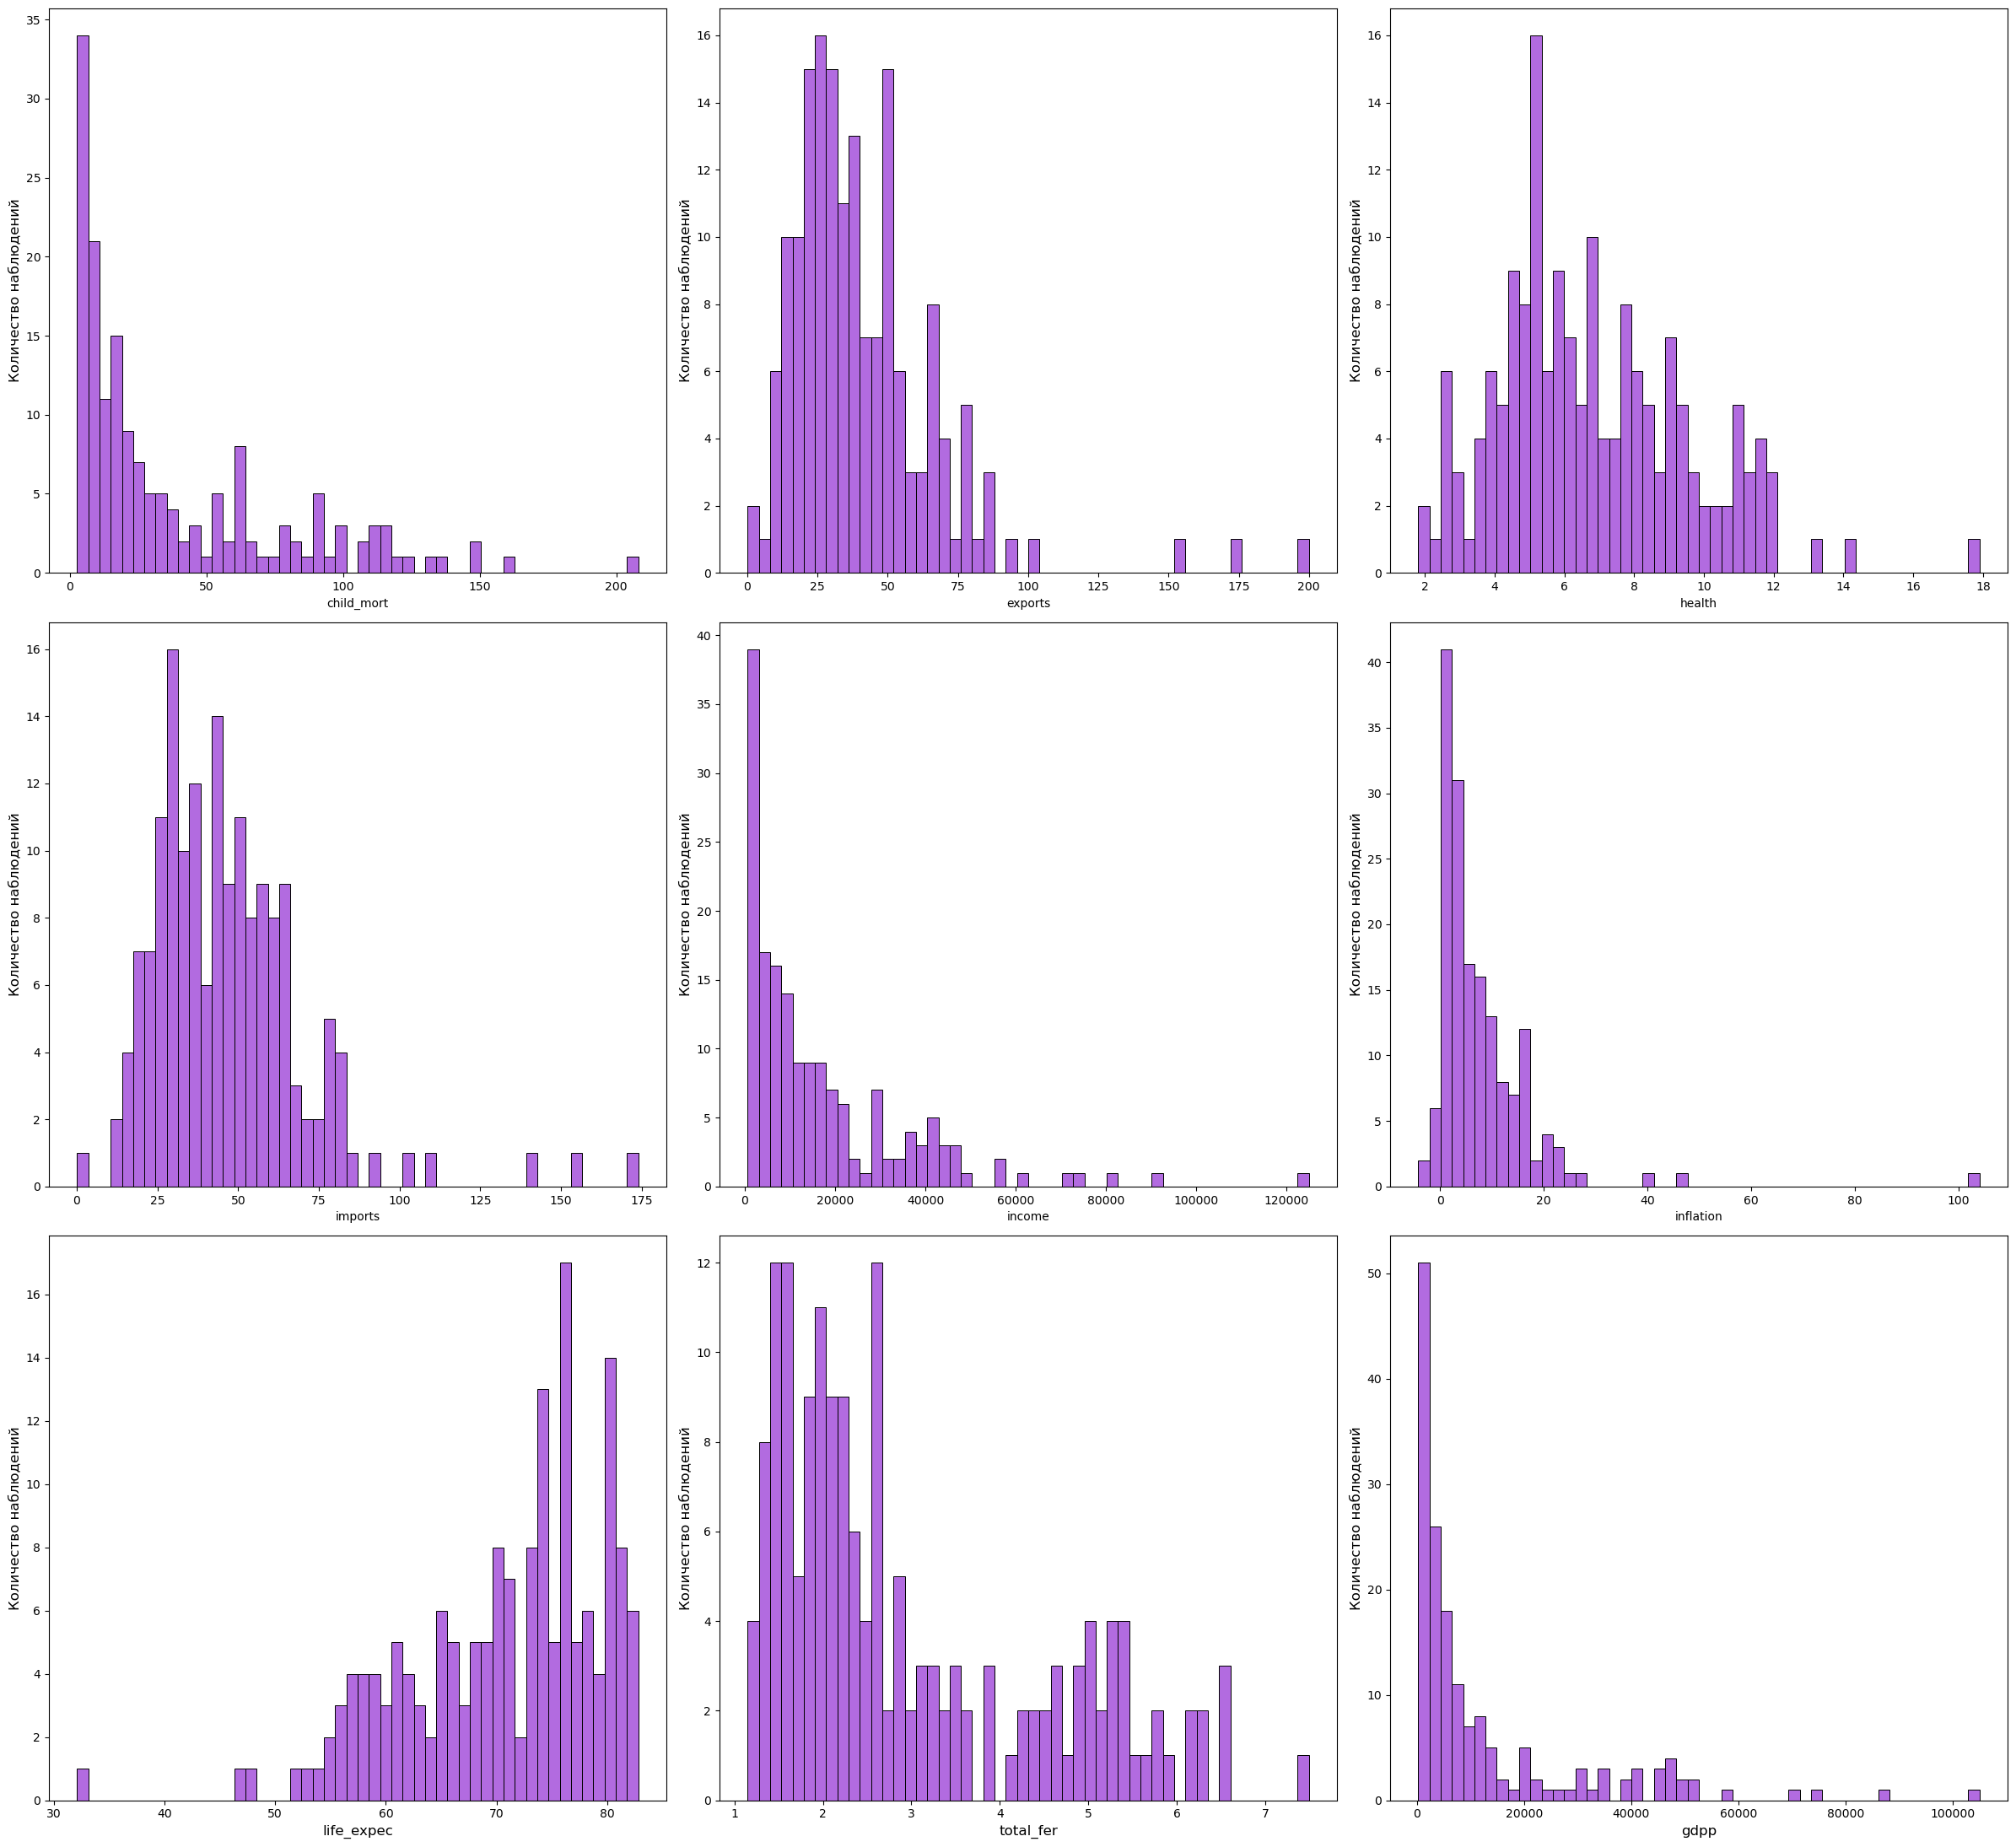

(None,)

In [7]:
k = 0
m = 3
fig, axes = plt.subplots(m, m, figsize=(24, 22))

for i, ax in enumerate(axes.flat):
    if i >= len(features):
        break
    sns.histplot(ax=ax, data=df, x=features[i], color='#9939d6', bins = 50)
    ax.set_ylabel('Количество наблюдений', fontsize=12)
    if i >= m * (m - 1):
        ax.set_xlabel(features[i], fontsize=12)

plt.tight_layout()
plt.show() ,

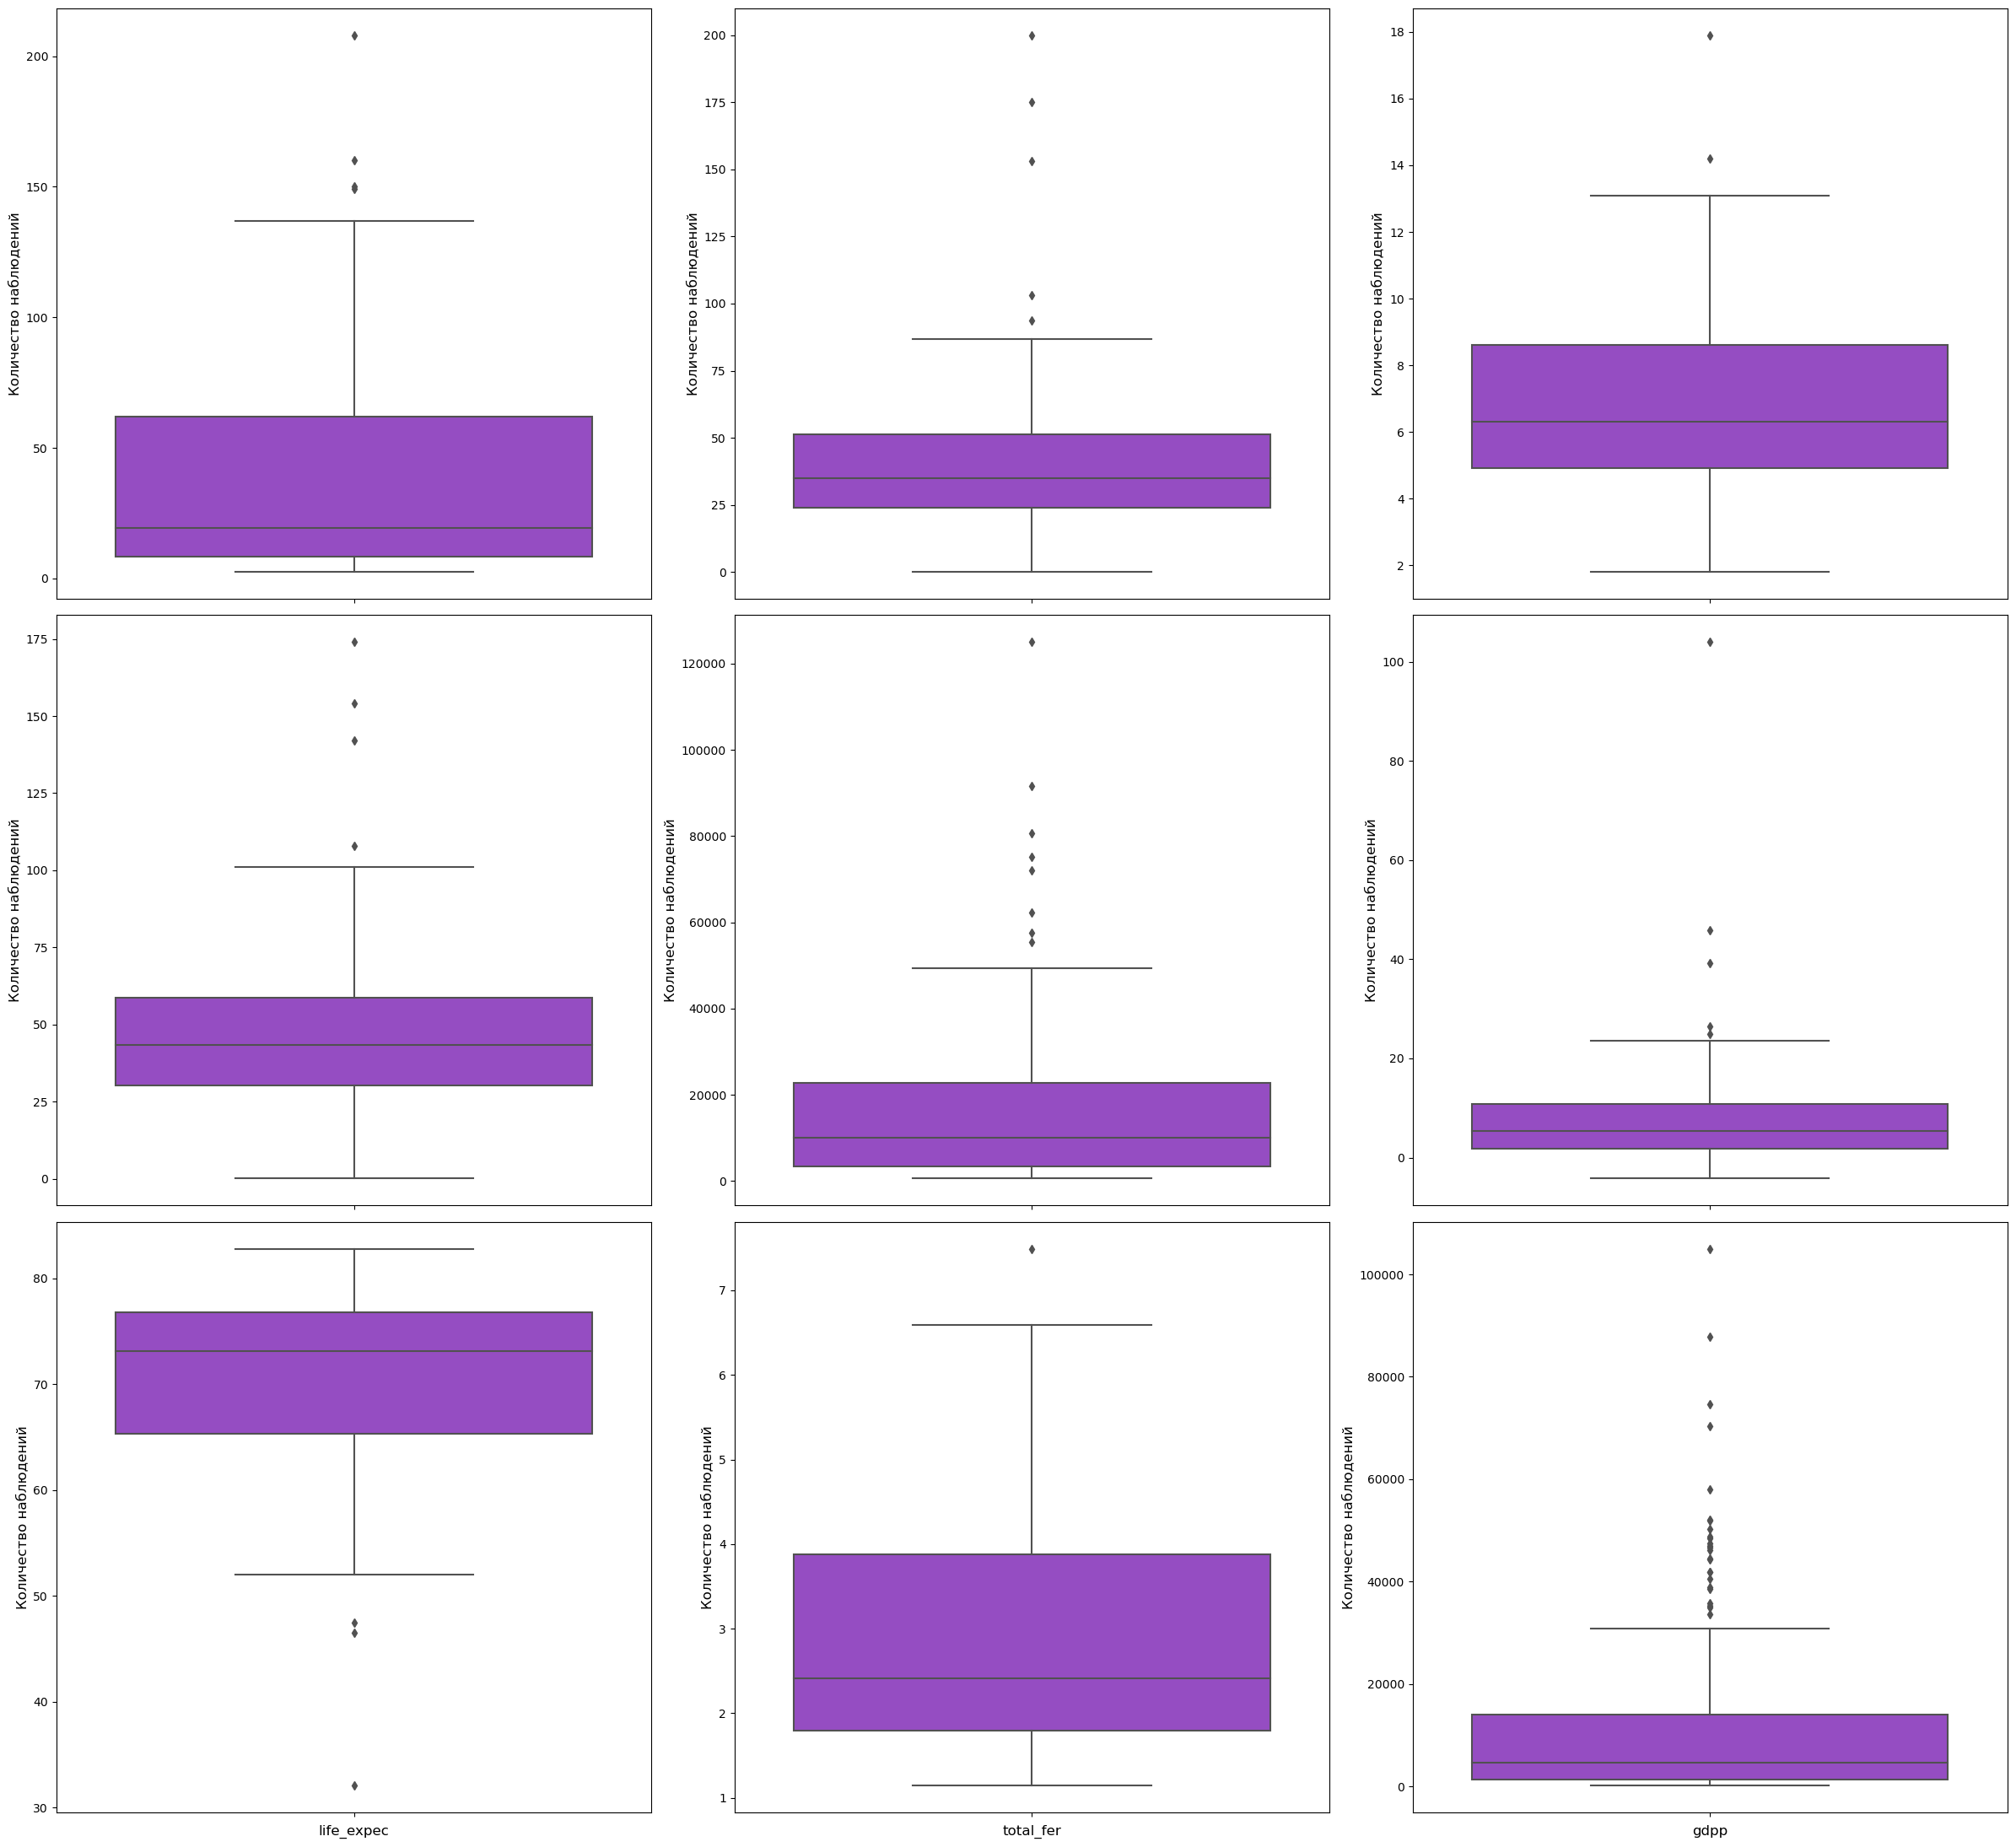

In [8]:
k = 0
m = 3
fig, axes = plt.subplots(m, m, figsize=(24, 22))

for i, ax in enumerate(axes.flat):
    if i >= len(features):
        break
    sns.boxplot(ax=ax, data=df, y=features[i], color='#9939d6')
    ax.set_ylabel('Количество наблюдений', fontsize=12)
    if i >= m * (m - 1):
        ax.set_xlabel(features[i], fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
def spearman_test(data_1, data_2):
    correlation = spearmanr(data_1, data_2)
    return '{0:.2f}\n{1:.2f}'.format(*correlation)

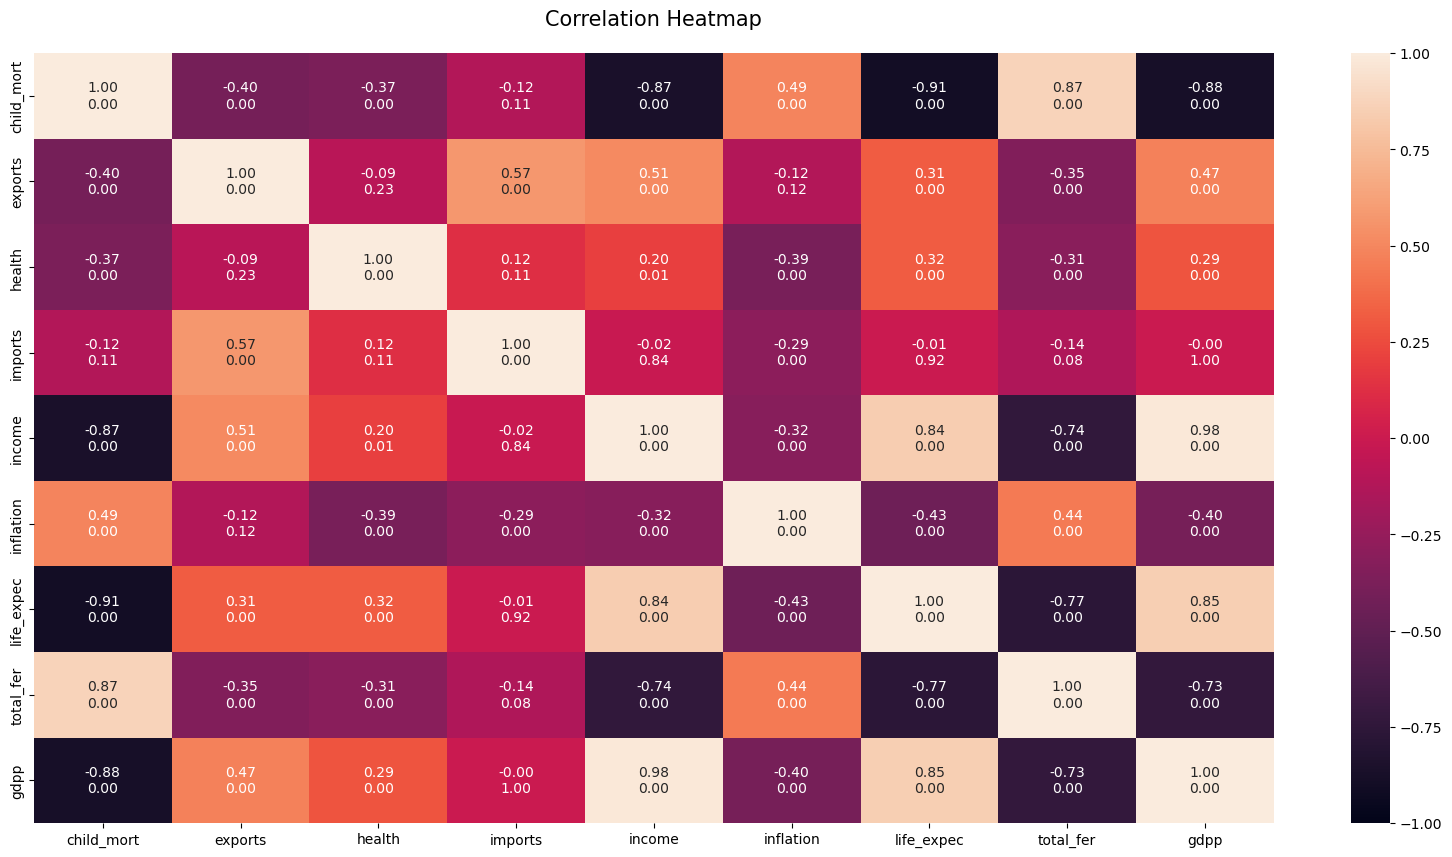

In [10]:
correlation = df[features].corr(method = 'spearman')
table = [[spearman_test(df[i], df[j]) for i in features] for j in features]
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=table, fmt='' )
heatmap.set_title('Correlation Heatmap', fontdict ={'fontsize':15}, pad=20);

Иза-за высокой интеркорреляции использовать вместе признаки child_mort, income, life_expec, total_fer и gdpp нецелесообразно, достаточно выбрать один из них

**Признаки, которые точно идут в модель**:   
- exports
- health
- imports
- inflation

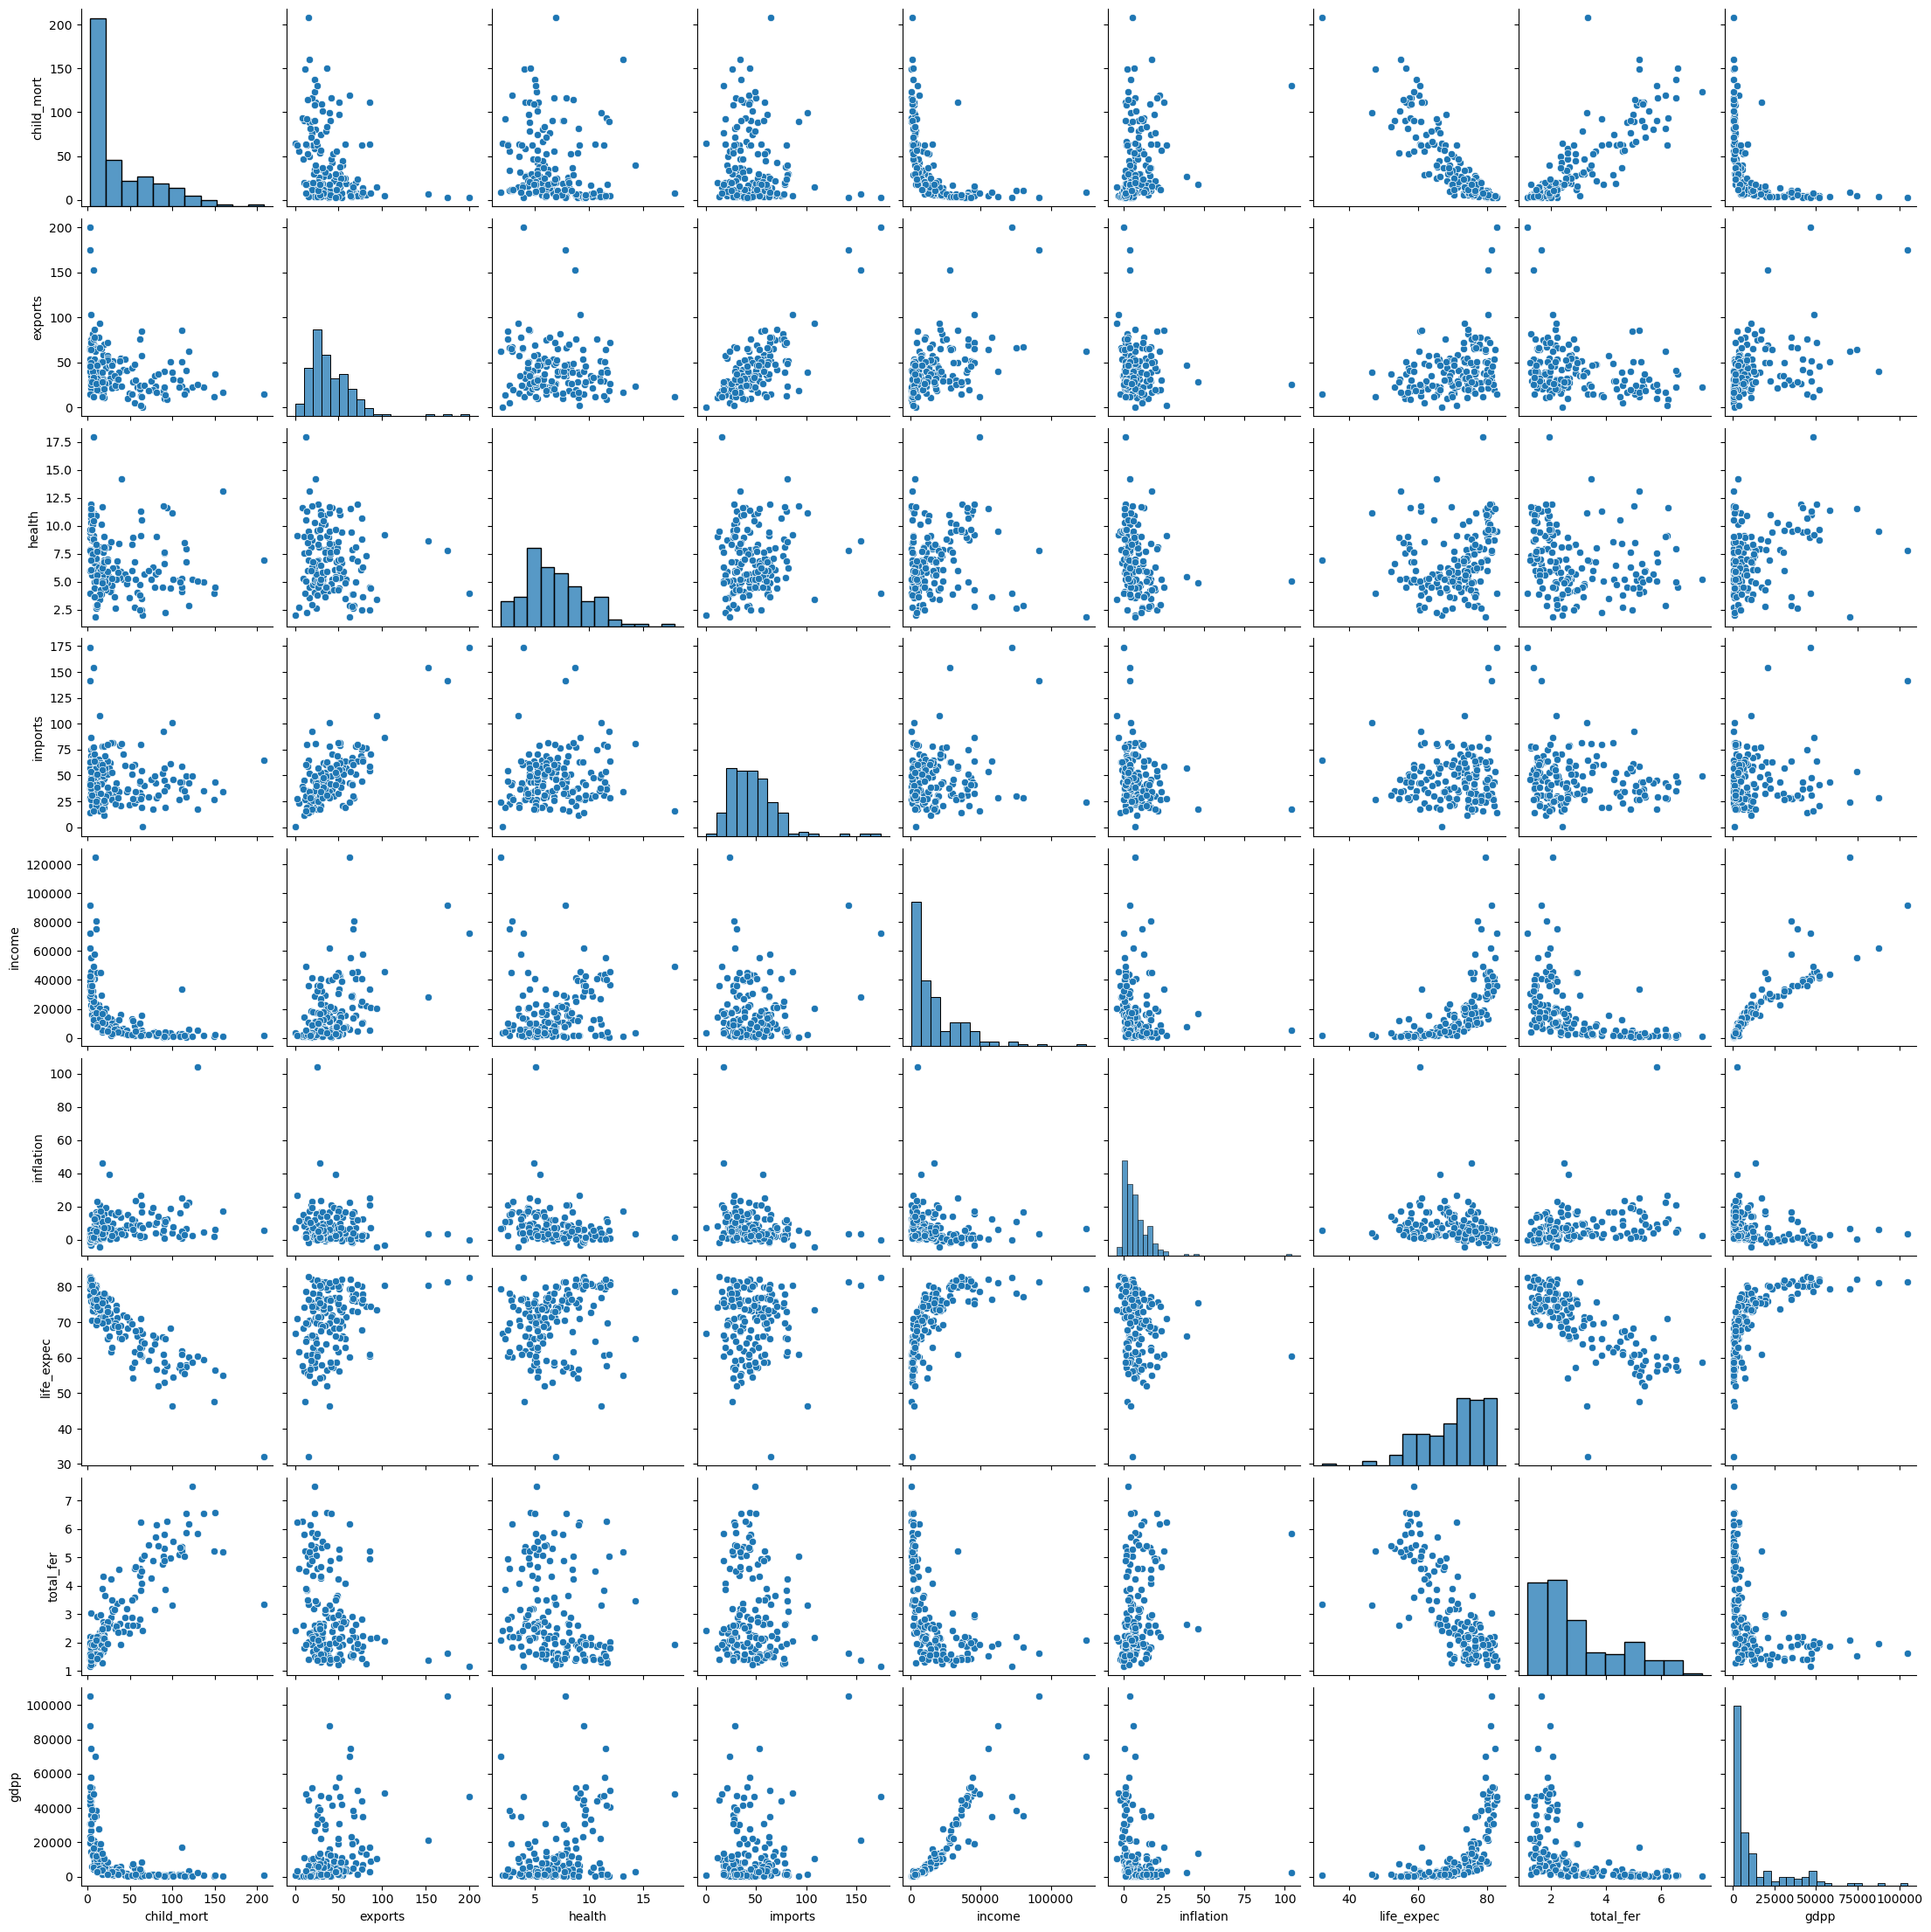

In [12]:
sns.pairplot(df[features])

In [15]:
corr_features = ['child_mort', 'income', 'life_expec', 'total_fer', 'gdpp']

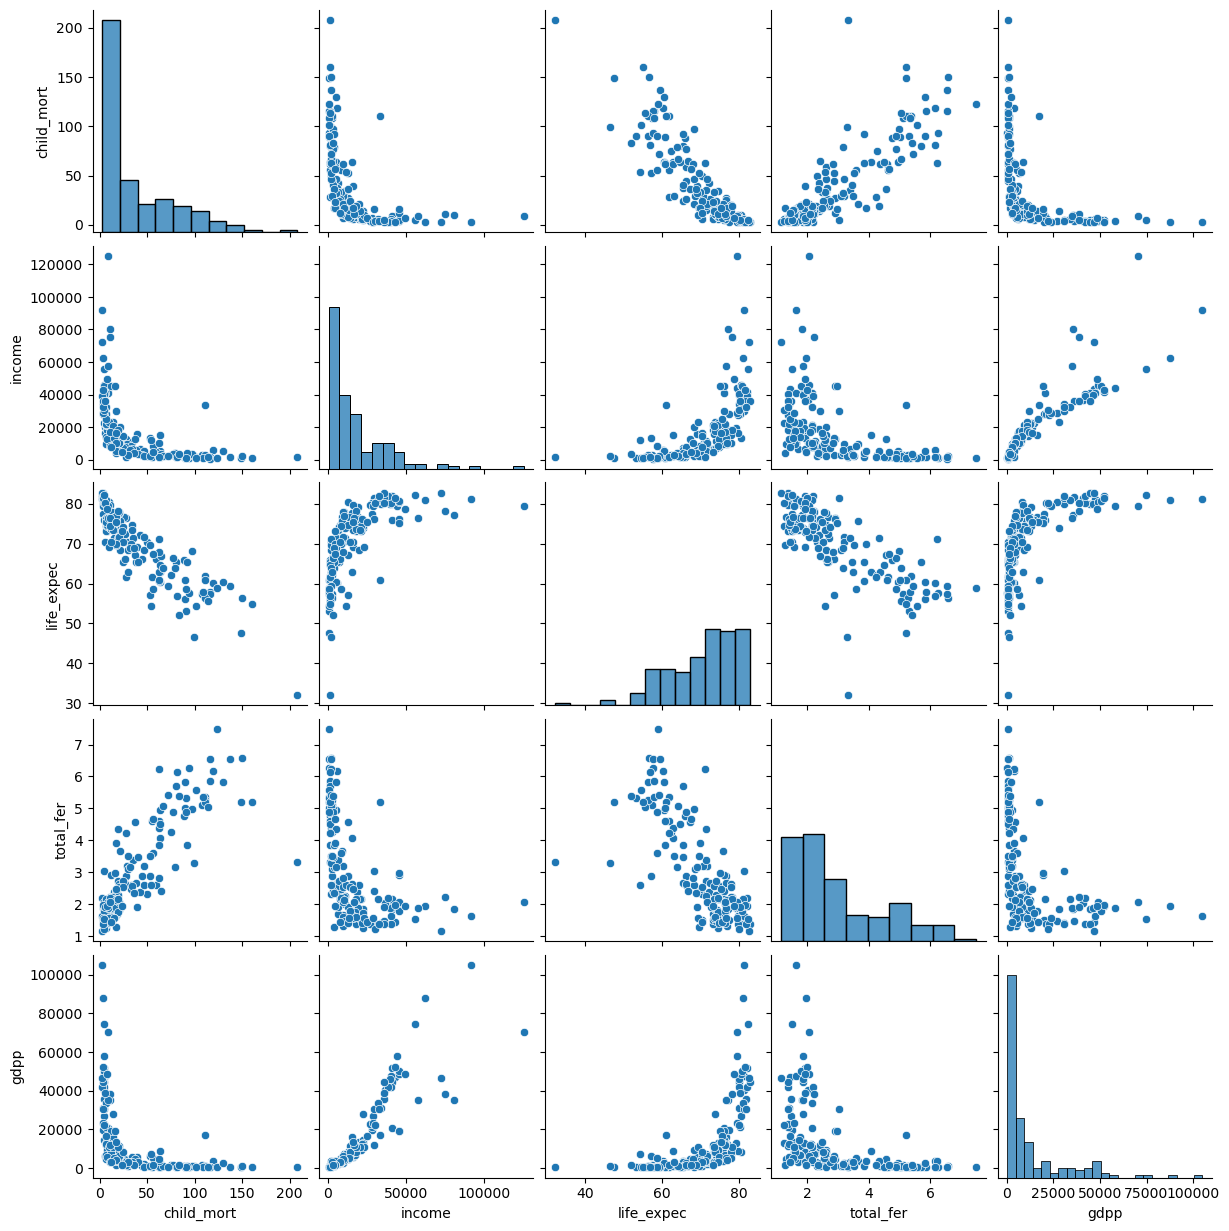

In [16]:
sns.pairplot(df[corr_features])

возьмем GDPP и total_fer

## Масштабирование

In [13]:
metric = ['exports', 'health','imports','inflation', 'gdpp', 'total_fer']

In [105]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[metric])
df_cluster = pd.DataFrame(scaled_data, columns = metric)
df_cluster['country'] = df['country']
df_cluster

,exports,health,imports,inflation,gdpp,total_fer,country
0,-1.138280,0.279088,-0.082455,0.157336,-0.679180,1.902882,Afghanistan
1,-0.479658,-0.097016,0.070837,-0.312347,-0.485623,-0.859973,Albania
2,-0.099122,-0.966073,-0.641762,0.789274,-0.465376,-0.038404,Algeria
3,0.775381,-1.448071,-0.165315,1.387054,-0.516268,2.128151,Angola
4,0.160668,-0.286894,0.497568,-0.601749,-0.041817,-0.541946,Antigua and Barbuda
...,...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.489784,-0.546913,0.365754,Vanuatu
163,-0.461363,-0.695862,-1.213499,3.616865,0.029323,-0.316678,Venezuela
164,1.130305,0.008877,1.380030,0.409732,-0.637754,-0.661206,Vietnam
165,-0.406478,-0.597272,-0.517472,1.500916,-0.637754,1.140944,Yemen


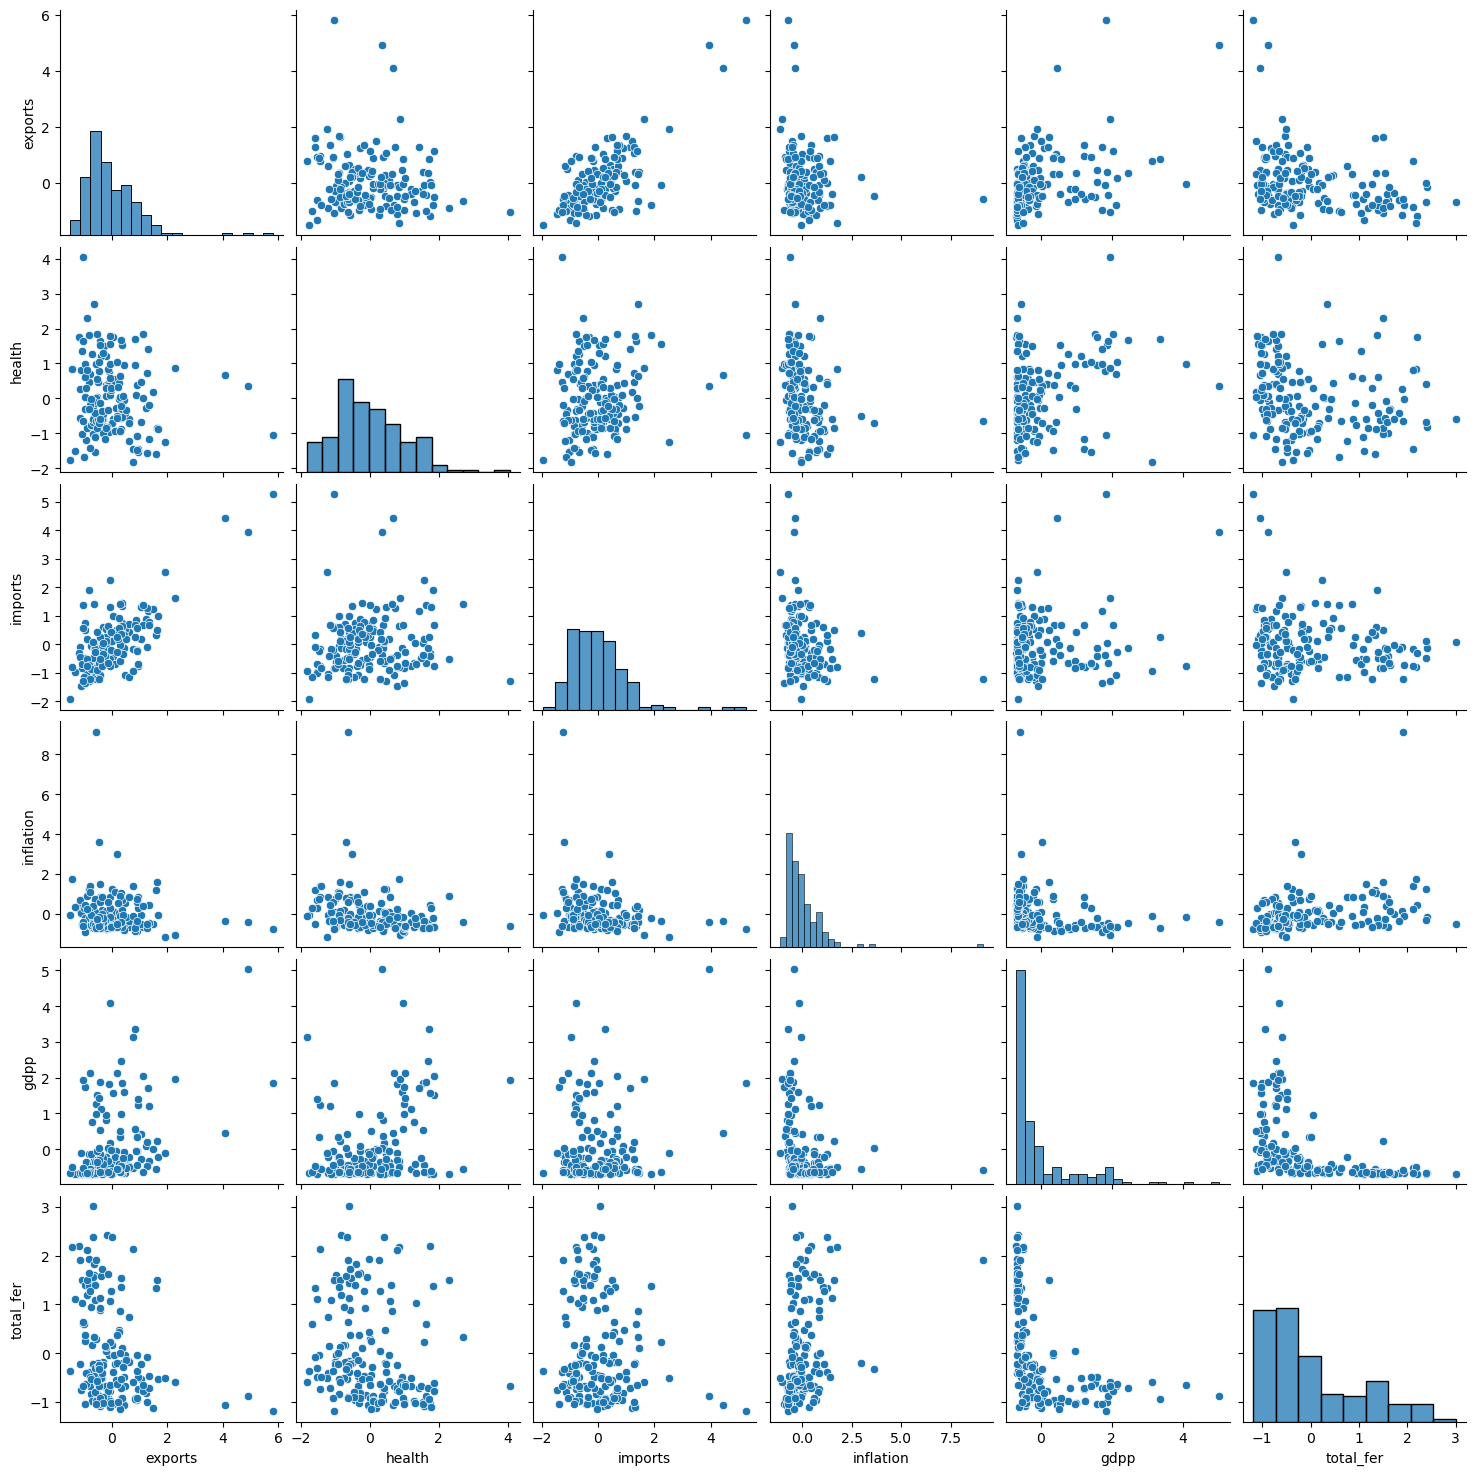

In [89]:
sns.pairplot(df_cluster[metric])

# KMeans

In [39]:
import warnings 
warnings.filterwarnings('ignore')

Text(0, 0.5, 'WCSS')

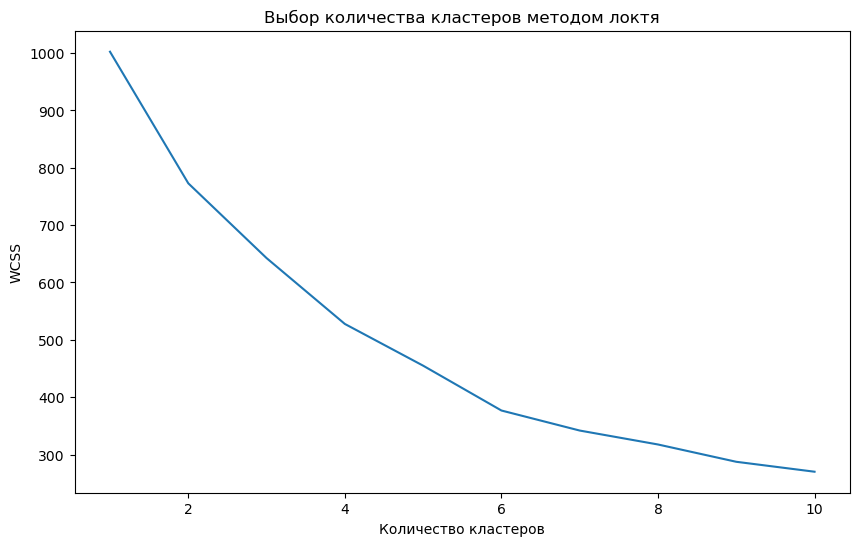

In [90]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df_cluster[metric])
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

6 кластеров - оптимум для kmeans

In [106]:
model = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = model.fit_predict(df_cluster[metric])
df_cluster['cluster_kmeans'] = y_pred

In [107]:
df_cluster_toagg_km = df_cluster.copy()
df_cluster_toagg_km[metric] = scaler.inverse_transform(scaled_data)
agg_clusters = df_cluster_toagg_km.groupby('cluster_kmeans').agg(['median','mean', 'std']).round(2)
agg_clusters['count'] = df_cluster_toagg_km.groupby('cluster_kmeans').count()['gdpp']
agg_clusters

exports                health              imports          \
                median    mean    std median   mean   std  median    mean   
cluster_kmeans                                                              
0                 35.0   41.36  21.44   9.64  10.06  2.60    32.9   37.89   
1                175.0  176.00  23.52   7.77   6.79  2.49   154.0  156.67   
2                 28.5   32.06  16.37   4.91   5.10  1.87    28.0   29.27   
3                 22.8   27.67  18.50   5.48   6.23  2.47    41.5   41.78   
4                 49.4   50.12  18.16   6.87   7.07  2.29    60.7   61.84   
5                 25.3   25.30    NaN   5.07   5.07   NaN    17.4   17.40   

                      inflation                   gdpp                      \
                  std    median    mean   std   median      mean       std   
cluster_kmeans                                                               
0               17.17      0.99    1.49  2.26  44500.0  45716.00  15125.19   
1               16.17      3.62    2.47  2.18  46600.0  57566.67  43011.67   
2               11.08      9.81   12.33  8.71   5020.0   7753.37   8238.00   
3               13.79      9.02   10.30  7.69    723.0   1567.20   2744.75   
4               14.51      3.12    4.09  3.94   6030.0   8184.35   7389.56   
5                 NaN    104.00  104.00   NaN   2330.0   2330.00       NaN   

               total_fer             count  
                  median  mean   std        
cluster_kmeans                              
0                   1.87  1.82  0.37    25  
1                   1.36  1.38  0.24     3  
2                   2.47  2.47  0.59    41  
3                   5.20  5.27  0.81    40  
4                   2.07  2.19  0.77    57  
5                   5.84  5.84   NaN     1

In [102]:
df_cluster[df_cluster['cluster_kmeans']==5] # Уникальная Нигерия?

,exports,health,imports,inflation,gdpp,total_fer,country,cluster_kmeans
113,25.3,5.07,17.4,104.0,2330.0,5.84,Nigeria,5


**Внутрикластерная дисперсия:**   

Кластер 0 (25 стран): умеренная дисперсия — относительно однородная группа.   

Кластер 1 (3 страны): низкая дисперсия по торговле, но высокая по ВВП/душу — неоднородность по богатству.   

Кластер 2 (41 страна): высокая дисперсия по инфляции и ВВП — значительные внутренние различия.   

Кластер 3 (40 стран): высокая дисперсия по всем показателям — возможна неоднородность группы.   

Кластер 4 (57 стран): умеренная дисперсия — однородная группа со средними показателями.   

Кластер 5 (1 страна): дисперсия не рассчитывается.   

**Характеристики кластеров:**    

0: Однородные развитые страны с высоким ВВП, низкой инфляцией и рождаемостью.

1: Страны с крайне открытой экономикой (очень высокий и стабильный экспорт и импорт) и очень низкой рождаемостью.    
 

2: Группа развивающихся стран с низкими уровнями торговли и расходов на здравоохранение, но характеризующаяся высокой и нестабильной инфляцией и разным ВВП.   

3:  Кластер стран с очень низким и крайне нестабильным ВВП на душу населения, высокой и нестабильной инфляцией, высокой и изменчивой рождаемостью, а также значительным разбросом в показателях экспорта и импорта.   

4: Наиболее многочисленный кластер, представляющий собой группу стран со средним уровнем дохода, умеренными и относительно стабильными показателями торговли, здравоохранения, инфляции и рождаемости.   

5: Аномальная страна с экстремальными значениями.   

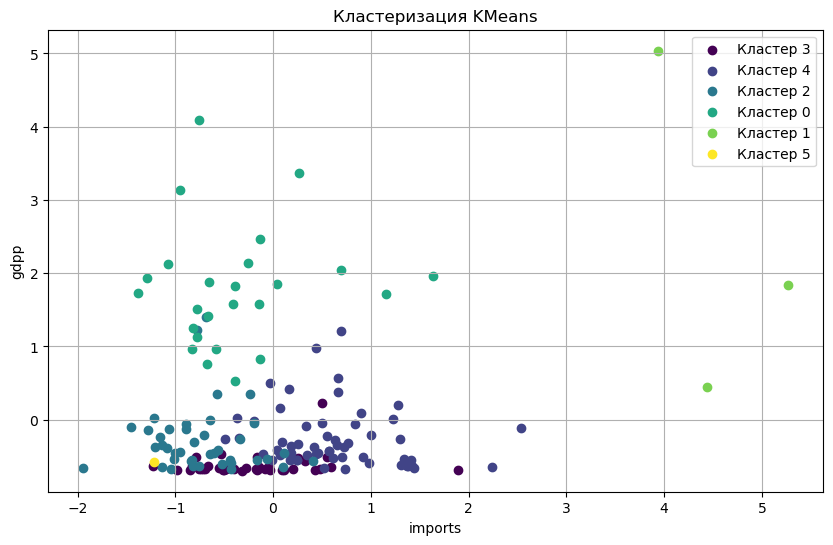

In [126]:
feature1 = df_cluster.columns[2]
feature2 = df_cluster.columns[4]
clusters = df_cluster['cluster_kmeans'].unique()
coors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))  # Генерация цветовой палитры
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(clusters):
    cluster_data = df_cluster[df_cluster['cluster_kmeans'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], color=colors[i], label=f'Кластер {cluster}')
plt.title('Кластеризация KMeans')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()

# Иерархическая кластеризация

In [109]:
df_cluster[metric]

,exports,health,imports,inflation,gdpp,total_fer
0,-1.138280,0.279088,-0.082455,0.157336,-0.679180,1.902882
1,-0.479658,-0.097016,0.070837,-0.312347,-0.485623,-0.859973
2,-0.099122,-0.966073,-0.641762,0.789274,-0.465376,-0.038404
3,0.775381,-1.448071,-0.165315,1.387054,-0.516268,2.128151
4,0.160668,-0.286894,0.497568,-0.601749,-0.041817,-0.541946
...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.489784,-0.546913,0.365754
163,-0.461363,-0.695862,-1.213499,3.616865,0.029323,-0.316678
164,1.130305,0.008877,1.380030,0.409732,-0.637754,-0.661206
165,-0.406478,-0.597272,-0.517472,1.500916,-0.637754,1.140944


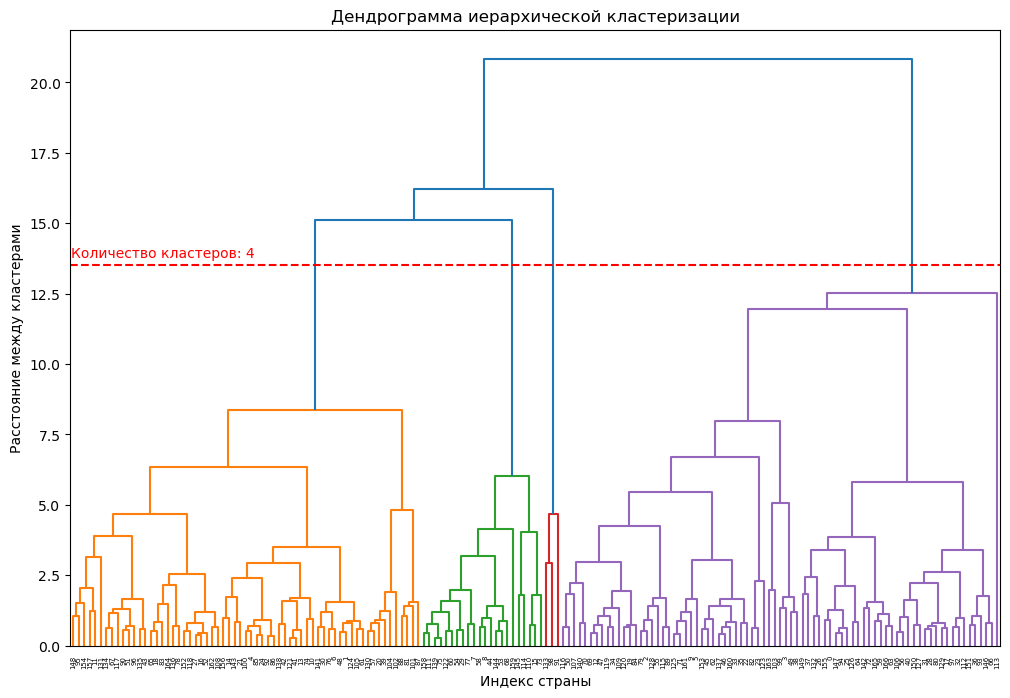

In [122]:
linked = linkage(df_cluster[metric], method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.plot(10, color = 'red')
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индекс страны')
plt.ylabel('Расстояние между кластерами')
plt.axhline(y=13.5, color='r', linestyle='--')
plt.text(1, 13.5 + 0.3, f'Количество кластеров: {4}', color='r', fontsize=10)
plt.show()

In [123]:
n_clusters_hierarchical = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
hierarchical_clusters = agg_clustering.fit_predict(df_cluster[metric])
df_cluster['cluster_hierarchical'] = hierarchical_clusters

In [125]:
df_cluster_toagg_h = df_cluster.copy()
df_cluster_toagg_h[metric] = scaler.inverse_transform(scaled_data)
agg_clusters = df_cluster_toagg_h.groupby('cluster_hierarchical').agg(['median','mean', 'std']).round(2)
agg_clusters['count'] = df_cluster_toagg_h.groupby('cluster_hierarchical').count()['gdpp']
agg_clusters

exports                health              imports  \
                      median    mean    std median   mean   std  median   
cluster_hierarchical                                                      
0                       25.3   30.23  18.09   5.16   5.57  2.21   33.00   
1                       47.8   48.37  18.11   6.84   7.04  2.33   58.90   
2                      175.0  176.00  23.52   7.77   6.79  2.49  154.00   
3                       34.5   40.99  22.37  10.20  10.64  1.91   34.05   

                                    inflation  ...     gdpp            \
                        mean    std    median  ...   median      mean   
cluster_hierarchical                           ...                      
0                      34.28  12.95      9.44  ...   1480.0   5501.03   
1                      60.41  15.60      3.12  ...   6030.0   8630.68   
2                     156.67  16.17      3.62  ...  46600.0  57566.67   
3                      38.49  18.01      0.93  ...  45350.0  46090.91   

                               total_fer             cluster_kmeans        \
                           std    median  mean   std         median  mean   
cluster_hierarchical                                                        
0                     10140.39      3.91  3.93  1.55            3.0  2.53   
1                      8043.47      2.07  2.21  0.82            4.0  3.73   
2                     43011.67      1.36  1.38  0.24            1.0  1.00   
3                     14377.06      1.87  1.76  0.28            0.0  0.00   

                           count  
                       std        
cluster_hierarchical              
0                     0.66    79  
1                     0.85    63  
2                     0.00     3  
3                     0.00    22  

[4 rows x 22 columns]

Кластер 0:  объединяет страны с преимущественно низким уровнем экономического развития и высокими показателями рождаемости, но высокая дисперсия по торговле, инфляции и особенно ВВП на душу населения делает этот кластер довольно размытым и неоднородным   

Кластер 1: представляет собой группу стран со средним уровнем экономического развития, умеренными показателями торговли, стабильной низкой инфляцией и умеренной рождаемостью. Кластер выглядит относительно однородным.   

Кластер 2: объединяет страны с крайне открытой экономикой (очень высокая доля внешней торговли) и очень низким уровнем рождаемости. Несмотря на высокий средний ВВП, неоднородность по этому показателю требует внимания.    

Кластер 3: представляет собой группу стран с высоким уровнем экономического развития, значительными расходами на здравоохранение, очень низкой инфляцией и низкой рождаемостью. Наблюдается некоторая неоднородность по ВВП на душу населения.   

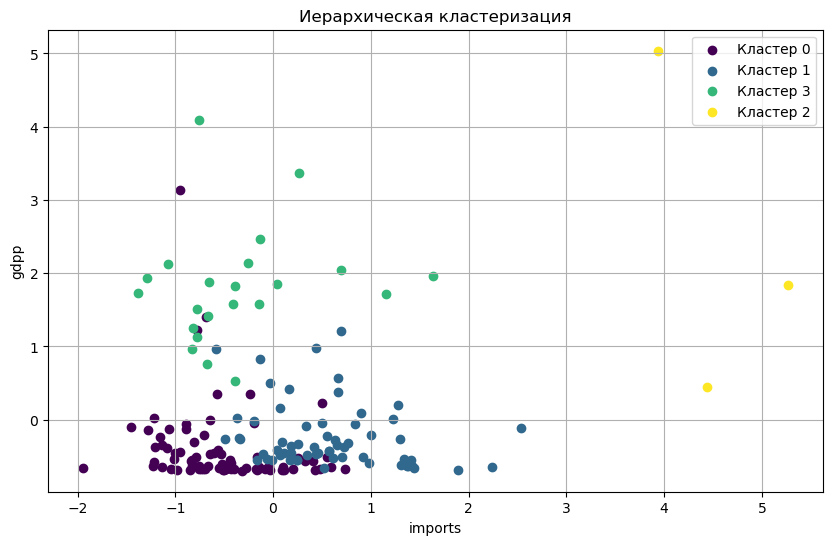

In [138]:
feature1 = df_cluster.columns[2]
feature2 = df_cluster.columns[4]
clusters = df_cluster['cluster_hierarchical'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))  # Генерация цветовой палитры
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(clusters):
    cluster_data = df_cluster[df_cluster['cluster_hierarchical'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], color=colors[i], label=f'Кластер {cluster}')
plt.title('Иерархическая кластеризация')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()

# DBSCAN

будем искать количество кластеров методом ближайших соседей


In [141]:
df_cluster

,exports,health,imports,inflation,gdpp,total_fer,country,cluster_kmeans,cluster_hierarchical
0,-1.138280,0.279088,-0.082455,0.157336,-0.679180,1.902882,Afghanistan,3,0
1,-0.479658,-0.097016,0.070837,-0.312347,-0.485623,-0.859973,Albania,4,1
2,-0.099122,-0.966073,-0.641762,0.789274,-0.465376,-0.038404,Algeria,2,0
3,0.775381,-1.448071,-0.165315,1.387054,-0.516268,2.128151,Angola,3,0
4,0.160668,-0.286894,0.497568,-0.601749,-0.041817,-0.541946,Antigua and Barbuda,4,1
...,...,...,...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.489784,-0.546913,0.365754,Vanuatu,4,1
163,-0.461363,-0.695862,-1.213499,3.616865,0.029323,-0.316678,Venezuela,2,0
164,1.130305,0.008877,1.380030,0.409732,-0.637754,-0.661206,Vietnam,4,1
165,-0.406478,-0.597272,-0.517472,1.500916,-0.637754,1.140944,Yemen,3,0


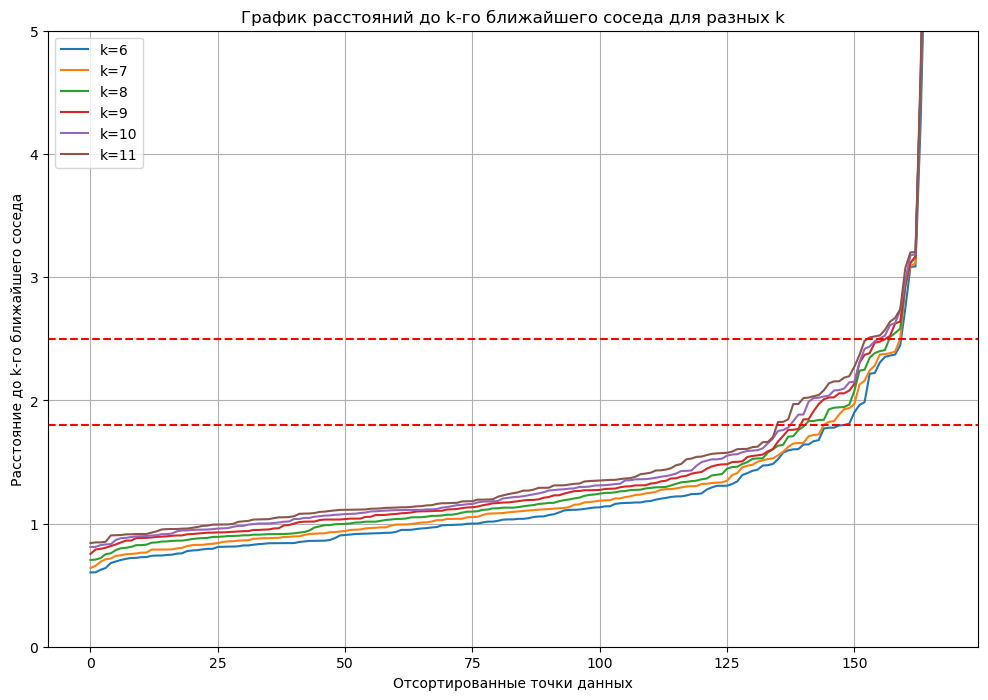

In [173]:
k_values = [6, 7, 8, 9, 10,11]
plt.figure(figsize=(12, 8))
for k in k_values:
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(df_cluster[metric])
    distances, indices = neighbors_fit.kneighbors(df_cluster[metric])
    # Берем расстояние до k-го ближайшего соседа (индекс k-1, т.к. нумерация с 0)
    kth_distances = np.sort(distances, axis=0)[:, k-1]
    plt.plot(kth_distances, label=f'k={k}')
plt.title('График расстояний до k-го ближайшего соседа для разных k')
plt.xlabel('Отсортированные точки данных')
plt.ylabel('Расстояние до k-го ближайшего соседа')
plt.axhline(y=1.8, color='r', linestyle='--')
plt.axhline(y=2.5, color='r', linestyle='--')
plt.ylim([0,5])
plt.legend()
plt.grid(True)
plt.show()

Вручную и по картинке как-то не получается, попробуем подобрать в цикле

In [232]:
eps_range = np.linspace(0.1, 3.0, 30)
min_samples_range = range(5, 15)     
all_results = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan.fit_predict(df_cluster[metric])
        n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
        n_noise = list(dbscan_clusters).count(-1)
        all_results.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'n_noise': n_noise})
results_df = pd.DataFrame(all_results)

In [233]:
results_df[(results_df['n_noise'] < 80) & (results_df['n_clusters'] >=2)]

,eps,min_samples,n_clusters,n_noise
80,0.9,5,5,60
81,0.9,6,3,78
90,1.0,5,2,43
91,1.0,6,2,53
92,1.0,7,2,55
93,1.0,8,3,64
94,1.0,9,3,72
104,1.1,9,2,48
105,1.1,10,2,53
106,1.1,11,2,61


In [234]:
eps_optimal = 1
min_samples_optimal = 5

dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan_clusters = dbscan.fit_predict(df_cluster[metric])
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)
print(f"Количество обнаруженных кластеров: {n_clusters}")
print(f"Количество выбросов: {n_noise}")

Количество обнаруженных кластеров: 2
Количество выбросов: 43


In [239]:
df_cluster['cluster_dbscan'] = dbscan_clusters
df_cluster_toagg_dbs = df_cluster.copy()
df_cluster_toagg_dbs[metric] = scaler.inverse_transform(scaled_data)
agg_clusters = df_cluster_toagg_dbs.groupby('cluster_dbscan').agg(['mean', 'std']).round(2)
agg_clusters['count'] = df_cluster_toagg_dbs.groupby('cluster_dbscan').count()['gdpp']
agg_clusters

exports        health       imports        inflation         \
                  mean    std   mean   std    mean    std      mean    std   
cluster_dbscan                                                               
-1               54.27  43.68   7.17  3.98   55.58  38.33     13.78  17.57   
 0               37.01  17.35   6.17  1.77   45.52  16.10      6.34   5.39   
 1               33.39  12.04  10.22  1.01   32.78   8.98      1.37   1.72   

                    gdpp           total_fer       cluster_kmeans        \
                    mean       std      mean   std           mean   std   
cluster_dbscan                                                            
-1              19428.93  26793.25      3.25  1.66           2.49  1.44   
 0               6201.57   6634.92      3.01  1.48           3.06  0.95   
 1              41237.50   9587.07      1.72  0.30           0.00  0.00   

               cluster_hierarchical       count  
                               mean   std        
cluster_dbscan                                   
-1                             0.84  1.07    43  
 0                             0.47  0.50   108  
 1                             3.00  0.00    16

Кластер 0: редставляет собой самую большую группу стран, характеризующихся низким уровнем экономического развития (низкий ВВП), ограниченными расходами на здравоохранение, относительно стабильной низкой инфляцией и высокой рождаемостью. Эти страны являются основными кандидатами на получение материальной помощи    

Кластер 1: Этот кластер включает небольшую группу стран с высоким уровнем экономического развития (высокий ВВП), значительными расходами на здравоохранение, очень низкой инфляцией и низкой рождаемостью. Эти страны, скорее всего, не нуждаются в первоочередной материальной помощи    

Кластер -1 (выбросы): демонстрируют значительную вариативность по всем признакам, особенно по торговле и инфляции. Некоторые из этих стран могут быть аномалиями или принадлежать к кластерам с иной плотностью. Некоторые из этих выбросов могут нуждаться в помощи из-за, например, очень высокой инфляции, но их неоднородность требует индивидуального рассмотрения 

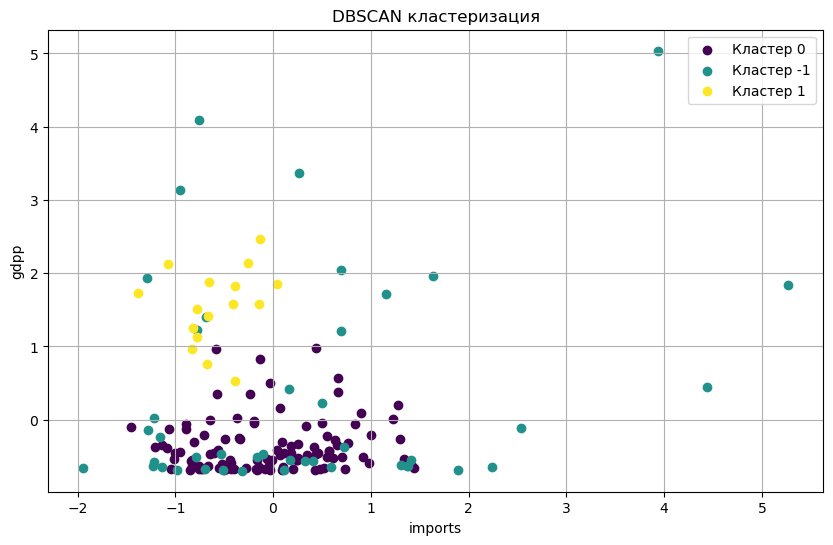

In [238]:
feature1 = df_cluster.columns[2]
feature2 = df_cluster.columns[4]
clusters = df_cluster['cluster_dbscan'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))  # Генерация цветовой палитры
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(clusters):
    cluster_data = df_cluster[df_cluster['cluster_dbscan'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], color=colors[i], label=f'Кластер {cluster}')
plt.title('DBSCAN кластеризация')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()

# Сравнение трех методов кластеризации

читывая результаты, KMeans и DBSCAN представляются наиболее полезными для решения данной задачи, хотя и с разными нюансами:    

**KMeans:** Выделил несколько кластеров, которые можно интерпретировать с точки зрения уровня развития и потенциальной потребности в помощи. Кластеры с низким ВВП и высокой инфляцией/рождаемостью явно указывают на нуждающиеся страны. Однако KMeans требует предварительного определения количества кластеров и не выделяет выбросы.

**DBSCAN:** Четко выделил большую группу стран (Кластер 0) с характеристиками, указывающими на высокую потребность в помощи (низкий ВВП, низкое здравоохранение, высокая рождаемость). Также выделил группу развитых стран (Кластер 1).   
Преимуществом DBSCAN является обнаружение значительного количества выбросов, среди которых могут быть страны с особыми проблемами (например, очень высокая инфляция), требующие индивидуального внимания. Однако интерпретация выбросов может быть менее однозначной, и результаты сильно зависят от правильной настройки параметров.    

**Иерархическая кластеризация** также дала полезное разделение, особенно среди развитых стран, но кластер, включающий страны с низким уровнем развития, оказался довольно неоднородным

## Рекомендации:

- Дальнейший анализ кластеров KMeans (кластеры 2 и 3) и DBSCAN (кластер 0) являются приоритетными, так как они, вероятно, содержат большинство стран, нуждающихся в первоочередной помощи.
- Следует внимательно изучить страны, отнесенные DBSCAN к выбросам, особенно те, которые характеризуются высокой инфляцией или другими признаками уязвимости.
- Рассмотрение возможности использования ансамблевого подхода, комбинируя результаты нескольких методов кластеризации для получения более надежных выводов.